1. Implementar una función en Python que calcule el máximo y el mínimo valor de un
arreglo de float.Retornar ambos valores en un arreglo.

In [397]:
def min_max_float(arr):
    if arr.size == 0:
        return []

    min_val = max_val = arr[0]

    for num in arr:
        if num < min_val:
            min_val = num
        if num > max_val:
            max_val = num

    return [min_val, max_val]


2. Implementar una función en C que calcule el máximo y el mínimo valor de un arreglo
de float. Retornar ambos valores en un arreglo.


In [398]:
%%file lib_min_max_float.c
#include <stdio.h>

void min_max_array_float(float arr[], int size, float result[]) {
    float min_value = arr[0];
    float max_value = arr[0];
    
    for (int i = 1; i < size; i++) {
        if (arr[i] < min_value) {
            min_value = arr[i];
        }
        if (arr[i] > max_value) {
            max_value = arr[i];
        }
    }
    
    result[0] = min_value;
    result[1] = max_value;
}

Overwriting lib_min_max_float.c


In [399]:
!gcc -c lib_min_max_float.c
!gcc -shared lib_min_max_float.o -o lib_min_max_float.so

3. Haciendo uso de la librería de ctypes, realizar un análisis temporal de 50 iteraciones
probando sus funciones para un arreglo de N = 1024 elementos.


In [400]:
import ctypes

lib = ctypes.CDLL("./lib_min_max_float.so")
lib.min_max_array_float.restype = None
lib.min_max_array_float.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int, ctypes.POINTER(ctypes.c_float)]
 
def funcion_float():
    return(
        lib.min_max_array_float, (ctypes.c_float * 2)()
    )                    

In [401]:
min_max_float_c, rpta_c = funcion_float()

In [402]:
import numpy as np
import time

def calcular_tiempo():
    N = 1024
    iterations = 50
    arr = np.random.uniform(low=0.0, high=10.0, size=N).astype(np.float32)

    c_start_time = time.time()
    for i in range(iterations):
        rpta_c = (ctypes.c_float * 2)()
        min_max_float_c(arr.ctypes.data_as(ctypes.POINTER(ctypes.c_float)), N, rpta_c)
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time) / iterations

    py_start_time = time.time()
    for i in range(iterations):
        rpta_py = min_max_float(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) / iterations

    # Extract numeric values from the C result
    c_result = [rpta_c[i] for i in range(2)]

    print(f"Tiempo de ejecución promedio en C : {c_average_time} s")
    print(f"Tiempo de ejecución promedio en Python : {py_average_time} s")
    print(f"Respuesta de C: {c_result}")
    print(f"Respuesta de Python: {rpta_py}")

In [403]:
calcular_tiempo()

Tiempo de ejecución promedio en C : 3.674983978271484e-05 s
Tiempo de ejecución promedio en Python : 0.00019572734832763673 s
Respuesta de C: [0.014381719753146172, 9.996461868286133]
Respuesta de Python: [0.01438172, 9.996462]


4. Realizar el análisis temporal para N = 512, 1024, 2048, 4096 y 8192

In [404]:
def calcular_tiempo2(N, python_times, c_times):
    iterations = 50
    arr = np.random.uniform(low=0.0, high=10.0, size=N).astype(np.float32)

    c_start_time = time.time()
    for i in range(iterations):
        rpta_c = (ctypes.c_float * 2)()
        min_max_float_c(arr.ctypes.data_as(ctypes.POINTER(ctypes.c_float)), N, rpta_c)
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time)
    c_times.append(c_average_time)

    py_start_time = time.time()
    for i in range(iterations):
        rpta_py = min_max_float(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) 
    python_times.append(py_average_time)

    # Extract numeric values from the C result
    c_result = [rpta_c[i] for i in range(2)]

    print(f"RESULTADOS PARA {N}:")
    print(f"Tiempo de ejecución promedio en C : {np.mean(c_times)} s")
    print(f"Tiempo de ejecución promedio en Python : {np.mean(python_times)} s")
    print(f"Respuesta de C: {c_result}")
    print(f"Respuesta de Python: {rpta_py}")


In [405]:
import  matplotlib.pyplot as plt

python_times = []
c_times = []
values = [512, 1024, 2048, 4096, 8192]
for N in values:
    calcular_tiempo2(N, python_times, c_times)

RESULTADOS PARA 512:
Tiempo de ejecución promedio en C : 0.0020759105682373047 s
Tiempo de ejecución promedio en Python : 0.0048675537109375 s
Respuesta de C: [0.04873738810420036, 9.989036560058594]
Respuesta de Python: [0.048737388, 9.989037]
RESULTADOS PARA 1024:
Tiempo de ejecución promedio en C : 0.001820683479309082 s
Tiempo de ejecución promedio en Python : 0.005773782730102539 s
Respuesta de C: [0.0013042145874351263, 9.991043090820312]
Respuesta de Python: [0.0013042146, 9.991043]
RESULTADOS PARA 2048:
Tiempo de ejecución promedio en C : 0.0017787615458170574 s
Tiempo de ejecución promedio en Python : 0.009913365046183268 s
Respuesta de C: [0.004033664241433144, 9.999303817749023]
Respuesta de Python: [0.0040336642, 9.999304]
RESULTADOS PARA 4096:
Tiempo de ejecución promedio en C : 0.0016636252403259277 s
Tiempo de ejecución promedio en Python : 0.01532655954360962 s
Respuesta de C: [0.004579958971589804, 9.995098114013672]
Respuesta de Python: [0.004579959, 9.995098]
RESULTA

5. Responder qué implementación ha sido la más rápida

Lenguaje de Bajo Nivel:

Localidad Temporal: C es un lenguaje de bajo nivel y permite un mayor control sobre el uso de la memoria. Los programas en C pueden gestionar de manera más eficiente la localidad temporal al minimizar la carga y descarga de datos en la memoria, ya que el programador tiene un control más directo sobre la gestión de la memoria.

Localidad Espacial: C permite un control más preciso sobre la localidad espacial, lo que significa que los datos se almacenan de manera contigua en la memoria. Esto facilita el acceso rápido a los datos en comparación con Python, donde los objetos pueden estar dispersos en la memoria.


Tipado Estático vs Dinámico:

Tipado Estático (C): C es un lenguaje de tipado estático, lo que significa que el tipo de variable se declara en tiempo de compilación. Esto permite al compilador realizar optimizaciones específicas para el tipo de datos.

Tipado Dinámico (Python): Python es de tipado dinámico, lo que significa que el tipo de variable se determina en tiempo de ejecución. Esto puede llevar a una mayor sobrecarga en la ejecución, ya que el intérprete debe realizar comprobaciones de tipo dinámico.

Operaciones a Nivel de Bajo Nivel:

Operaciones SIMD (Single Instruction, Multiple Data): Los compiladores de C pueden realizar optimizaciones SIMD para realizar operaciones en paralelo en conjuntos de datos, lo que puede mejorar significativamente el rendimiento.
Eficiencia en el Acceso a Memoria:

Caché de Hardware: Los programas en C tienen un mejor control sobre el acceso a la memoria y pueden estar más optimizados para aprovechar eficientemente las jerarquías de caché de hardware, mejorando así el rendimiento.

6. Generar una gráfica SpeedUP y comentar acerca de la tendencia

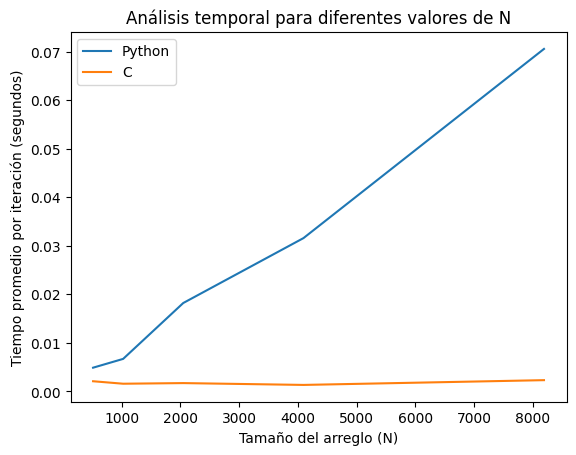

In [406]:
plt.plot(values, python_times, label='Python')
plt.plot(values, c_times, label='C')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N')
plt.legend()
plt.show()

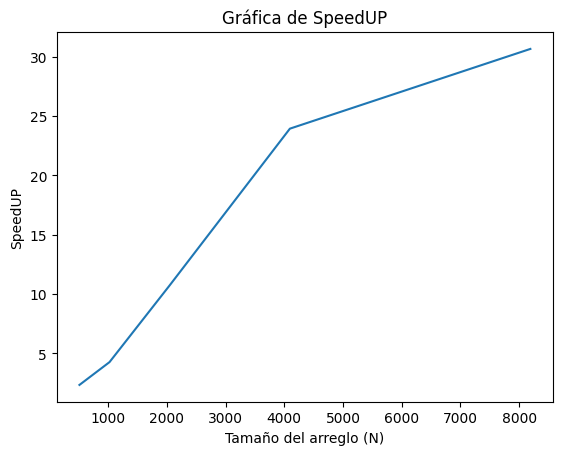

In [407]:
speedup = [python_time / c_time for python_time, c_time in zip(python_times, c_times)]

plt.plot(values, speedup)
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('SpeedUP')
plt.title('Gráfica de SpeedUP')
plt.show()